<a href="https://colab.research.google.com/github/HardikxLabeitazer/DataAnalysis/blob/master/DataAnalysis8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
fb = pd.read_csv('/content/drive/MyDrive/DataAnalysis/chp5/fb_stock_prices_2018.csv',index_col='date',parse_dates=True)
quakes = pd.read_csv('/content/drive/MyDrive/DataAnalysis/chp5/earthquakes.csv')
covid = pd.read_csv('/content/drive/MyDrive/DataAnalysis/chp5/covid19_cases.csv').assign(
    date= lambda x: pd.to_datetime(x.dateRep,format='%d/%m/%Y')
).set_index('date').replace(
    'United_States_of_America','USA'
).sort_index()['2020-01-18':'2020-09-18']

In [29]:
new_cases_rolling_average = covid.pivot_table(
    index=covid.index,
    columns = 'countriesAndTerritories',
    values='cases'
).rolling(7).mean()

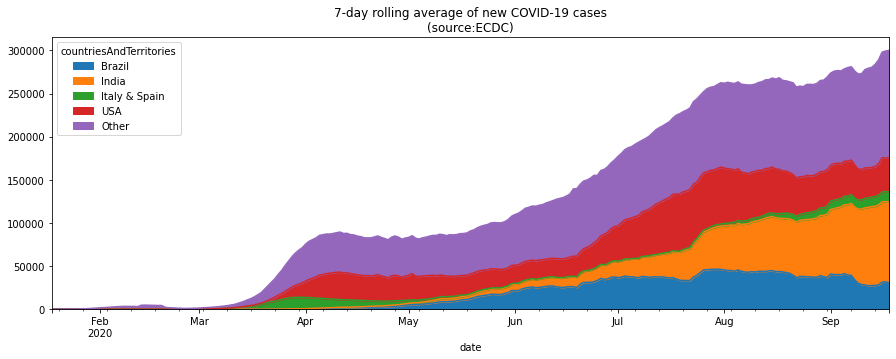

In [30]:
cols = [
        col for col in new_cases_rolling_average.columns
        if col not in[
                      'USA','Brazil','India','Italy & Spain'
        ]
]

new_cases_rolling_average.assign(
    **{'Italy & Spain':lambda x:x.Italy + x.Spain}
).sort_index(axis=1).assign(
    Other = lambda x:x[cols].sum(axis=1)
).drop(columns=cols).plot(
    kind='area',figsize=(15,5),
    title='7-day rolling average of new COVID-19 cases\n(source:ECDC)'
)

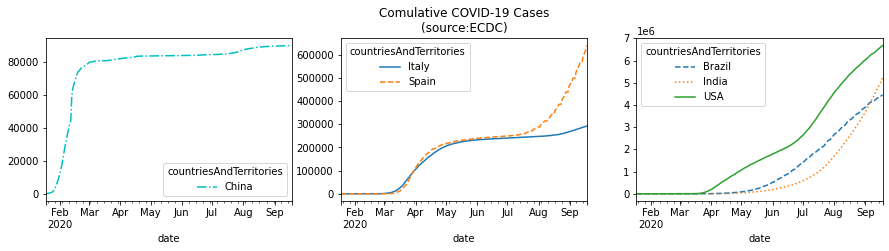

In [31]:
fig,axes = plt.subplots(1,3,figsize=(15,3))

commulative_covid_cases = covid.groupby(
    ['countriesAndTerritories',pd.Grouper(freq='1D')]
).cases.sum().unstack(0).apply('cumsum')

commulative_covid_cases[['China']].plot(ax=axes[0],style='-.c')
commulative_covid_cases[['Italy','Spain']].plot(
    ax=axes[1],style=['-','--'],title='Comulative COVID-19 Cases\n(source:ECDC)'
)
commulative_covid_cases[['Brazil','India','USA']].plot(ax=axes[2],style=['--',':','-'])

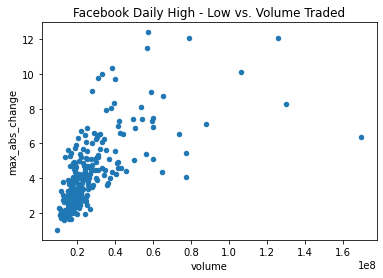

In [32]:
fb.assign(
    max_abs_change = fb.high -fb.low
).plot(
    kind='scatter',x='volume',y='max_abs_change',
    title='Facebook Daily High - Low vs. Volume Traded'
)

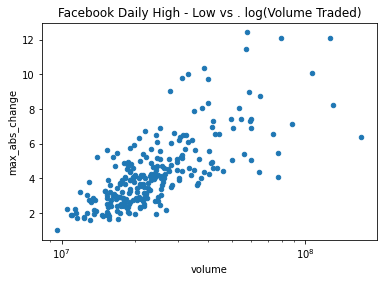

In [33]:
fb.assign(
    max_abs_change=fb.high-fb.low

).plot(
    kind='scatter',x='volume',y='max_abs_change',
    title='Facebook Daily High - Low vs . log(Volume Traded)',logx=True
)

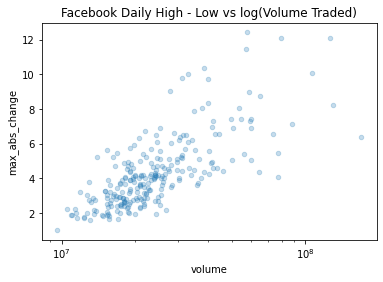

In [34]:
fb.assign(
    max_abs_change = fb.high - fb.low
).plot(
    kind='scatter',x='volume',y='max_abs_change',
    title = 'Facebook Daily High - Low vs log(Volume Traded)',logx=True,alpha=0.25
)

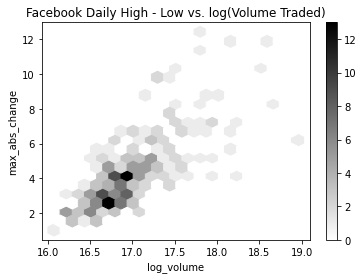

In [35]:
fb.assign(
    log_volume = np.log(fb.volume),
    max_abs_change = fb.high-fb.low
).plot(
    kind='hexbin',
    x='log_volume',
    y='max_abs_change',
    title='Facebook Daily High - Low vs. log(Volume Traded)',
    colormap = 'gray_r',
    gridsize=20,
    sharex=False
)

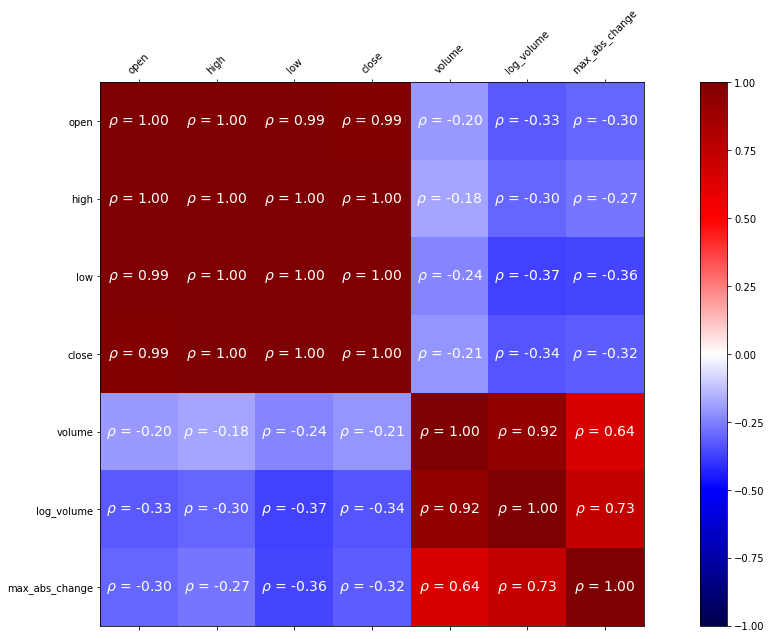

In [36]:
fig,ax = plt.subplots(figsize=(20,10))
fb_corr= fb.assign(
    log_volume = np.log(fb.volume),
    max_abs_change = fb.high - fb.low
).corr()

im = ax.matshow(fb_corr,cmap='seismic')
im.set_clim(-1,1)
fig.colorbar(im)

labels = [col.lower() for col in fb_corr.columns]
ax.set_xticks(ax.get_xticks()[1:-1])
ax.set_xticklabels(labels,rotation=45)
ax.set_yticks(ax.get_yticks()[1:-1])
ax.set_yticklabels(labels)

for(i,j),coef in np.ndenumerate(fb_corr):
  ax.text(
      i,j,fr'$\rho$ = {coef:.2f}',
      ha='center',va='center',
      color='white',fontsize=14
  )

Text(0.5, 0, 'Volume traded')

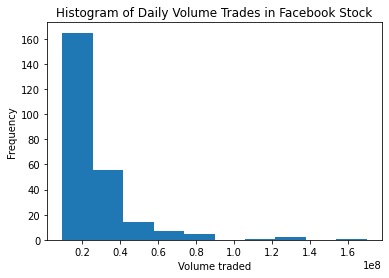

In [37]:
#Distributions
fb.volume.plot(
    kind='hist',
    title='Histogram of Daily Volume Trades in Facebook Stock'
)
plt.xlabel('Volume traded')

Text(0.5, 0, 'magnitude')

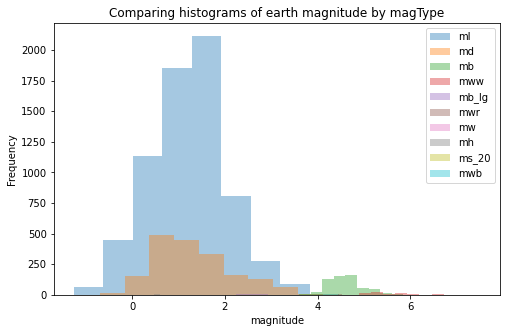

In [40]:
fig,axes = plt.subplots(figsize=(8,5))
for magtype in quakes.magType.unique():
  data = quakes.query(f'magType=="{magtype}"').mag
  if not data.empty:
    data.plot(
        kind='hist',
        ax=axes,
        alpha=0.4,
        label=magtype,
        legend=True,
        title='Comparing histograms of earth magnitude by magType'
    )

plt.xlabel('magnitude')

Text(0.5, 0, 'Price {$}')

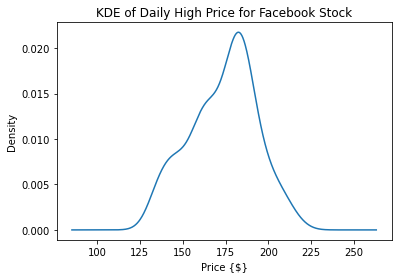

In [41]:
fb.high.plot(
    kind='kde'
    ,title='KDE of Daily High Price for Facebook Stock'
)
plt.xlabel('Price {$}')

Text(0.5, 0, 'Price {$}')

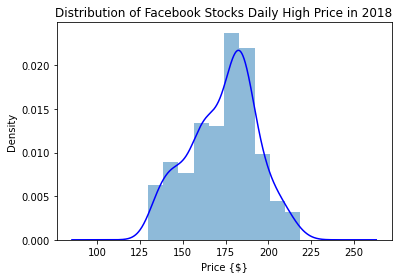

In [42]:
ax = fb.high.plot(kind='hist',density=True,alpha=0.5)
fb.high.plot(
    ax=ax,kind='kde',color='blue',
    title='Distribution of Facebook Stocks Daily High Price in 2018'

)
plt.xlabel('Price {$}')

Text(0.5, 1.0, 'ECDF of earthquake magnitude with magType ml')

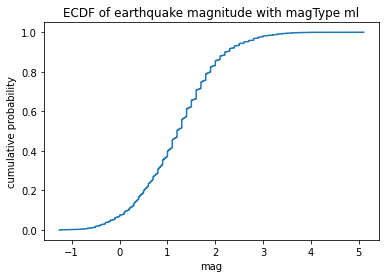

In [43]:
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(quakes.query('magType=="ml"').mag)
plt.plot(ecdf.x,ecdf.y)

plt.xlabel('mag')
plt.ylabel('cumulative probability')
plt.title('ECDF of earthquake magnitude with magType ml')

Text(0, 0.5, 'price ($)')

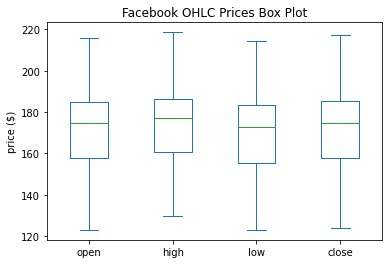

In [44]:
fb.iloc[:,:4].plot(
    kind='box',
    title='Facebook OHLC Prices Box Plot'
)
plt.ylabel('price ($)')

Text(0.5, 1.1, 'Facebook OHLC Box Plots By Volume Traded')

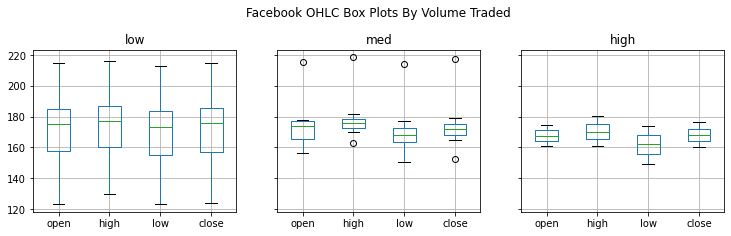

In [45]:
fb.assign(
    volume_bin=pd.cut(fb.volume,3,labels=['low','med','high'])
).groupby('volume_bin').boxplot(
    column=['open','high','low','close']
    ,layout=(1,3),figsize=(12,3)
)
plt.suptitle(
    'Facebook OHLC Box Plots By Volume Traded',y=1.1
)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


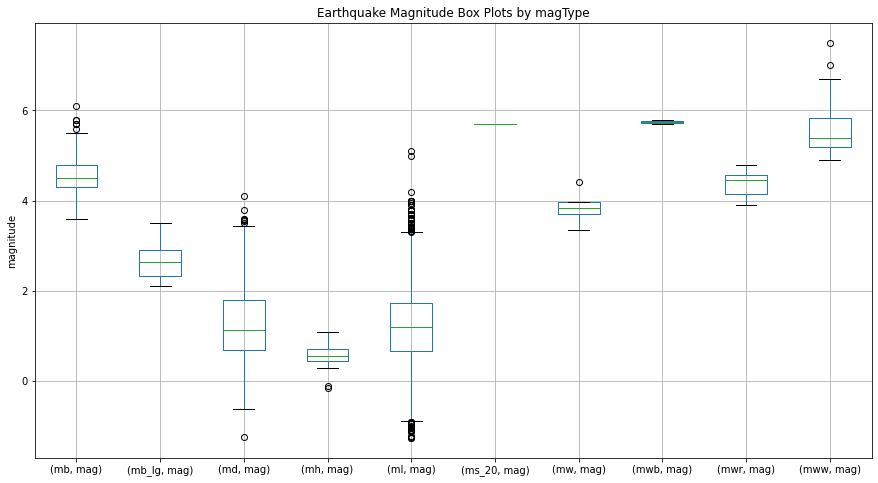

In [47]:
quakes[['mag','magType']].groupby('magType').boxplot(figsize=(15,8),subplots=False)
plt.title('Earthquake Magnitude Box Plots by magType')
plt.ylabel('magnitude')
plt.show()

Text(0.5, 0, 'earthquakes')

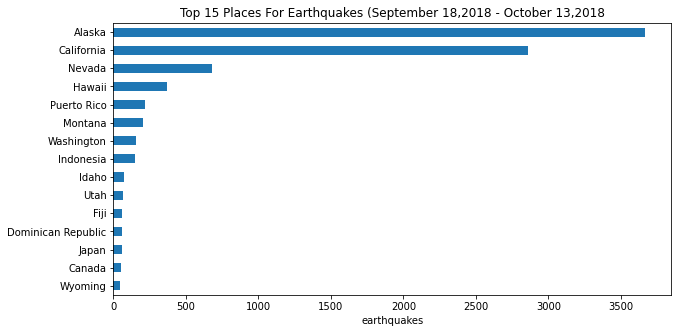

In [48]:
quakes.parsed_place.value_counts().iloc[14::-1,].plot(
    kind='barh',figsize=(10,5),
    title='Top 15 Places For Earthquakes (September 18,2018 - October 13,2018'
)
plt.xlabel('earthquakes')

Text(0.5, 0, 'tsunamis')

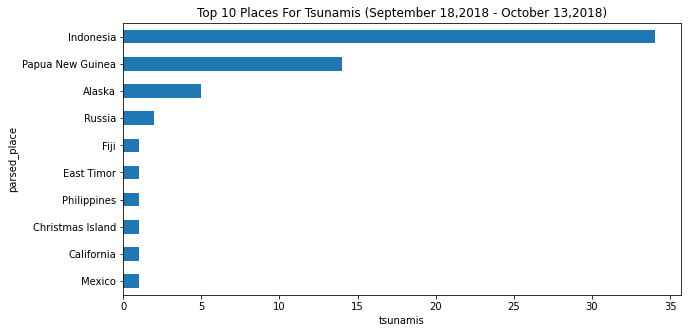

In [49]:
quakes.groupby(
    'parsed_place'
).tsunami.sum().sort_values().iloc[-10:,].plot(
    kind='barh',figsize=(10,5),
    title='Top 10 Places For Tsunamis (September 18,2018 - October 13,2018)'
)
plt.xlabel('tsunamis')

Text(0, 0.5, 'count')

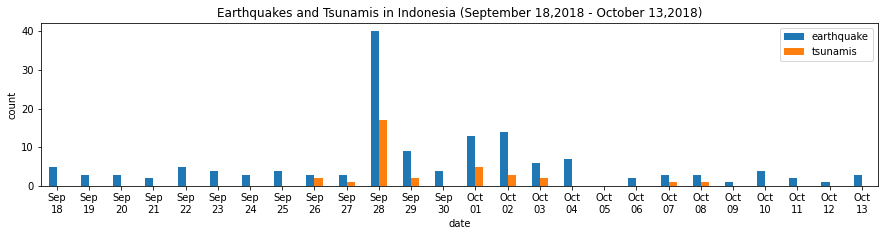

In [50]:
indonesia_quakes = quakes.query(
    'parsed_place=="Indonesia"'
).assign(
    time = lambda x:pd.to_datetime(x.time,unit='ms'),
    earthquake=1
).set_index('time').resample('1D').sum()

indonesia_quakes.index = indonesia_quakes.index.strftime('%b\n%d')

indonesia_quakes.plot(
    y=['earthquake','tsunami'],kind='bar',rot=0,figsize=(15,3),label=['earthquake','tsunamis'],
    title='Earthquakes and Tsunamis in Indonesia (September 18,2018 - October 13,2018)'
)

plt.xlabel('date')
plt.ylabel('count')

Text(0, 0.5, '')

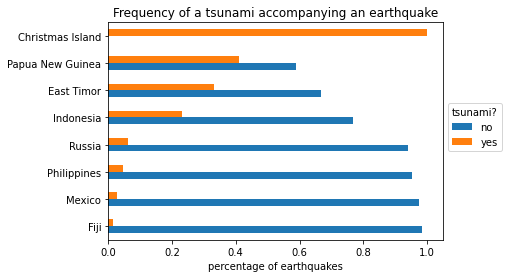

In [51]:
quakes.groupby(['parsed_place','tsunami']).mag.count().unstack().apply(
    lambda x:x /x.sum(),axis=1
).rename(columns={0:'no',1:'yes'}
         ).sort_values('yes',ascending=False)[7::-1].plot.barh(
             title='Frequency of a tsunami accompanying an earthquake'
         )

plt.legend(title='tsunami?',bbox_to_anchor=(1,0.65))
plt.xlabel('percentage of earthquakes')
plt.ylabel('')

Text(0, 0.5, 'earthquakes')

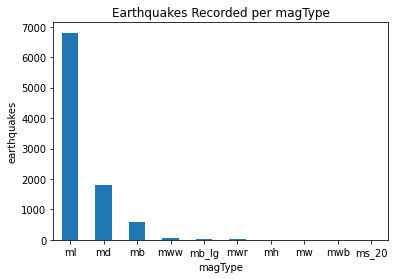

In [52]:
quakes.magType.value_counts().plot(
    kind='bar',rot=0,
    title='Earthquakes Recorded per magType'
)

plt.xlabel('magType')
plt.ylabel('earthquakes')

In [53]:
pivot = quakes.assign(
    mag_bin = lambda x:np.floor(x.mag)
).pivot_table(
    index = 'mag_bin',
    columns='magType',
    values='mag',
    aggfunc = 'count'
)

In [56]:
pivot

magType,mb,mb_lg,md,mh,ml,ms_20,mw,mwb,mwr,mww
mag_bin,,,,,,,,,,
-2.0,NaN,NaN,1.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN
-1.0,NaN,NaN,29.0,2.0,446.0,NaN,NaN,NaN,NaN,NaN
0.0,NaN,NaN,721.0,9.0,2072.0,NaN,NaN,NaN,NaN,NaN
1.0,NaN,NaN,700.0,1.0,3126.0,NaN,NaN,NaN,NaN,NaN
2.0,NaN,25.0,267.0,NaN,985.0,NaN,NaN,NaN,NaN,NaN
3.0,7.0,5.0,77.0,NaN,153.0,NaN,3.0,NaN,2.0,NaN
4.0,514.0,NaN,1.0,NaN,6.0,NaN,1.0,NaN,12.0,2.0
5.0,79.0,NaN,NaN,NaN,2.0,1.0,NaN,2.0,NaN,55.0
6.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0


Text(0, 0.5, 'earthquakes')

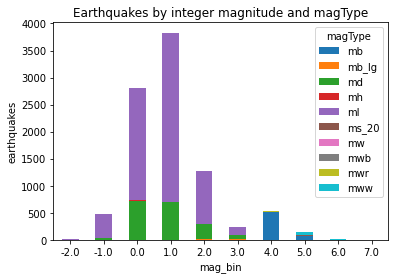

In [55]:
pivot.plot.bar(
    stacked=True,
    rot=0,
    title='Earthquakes by integer magnitude and magType'
)
plt.ylabel('earthquakes')

Text(0, 0.5, 'percentage')

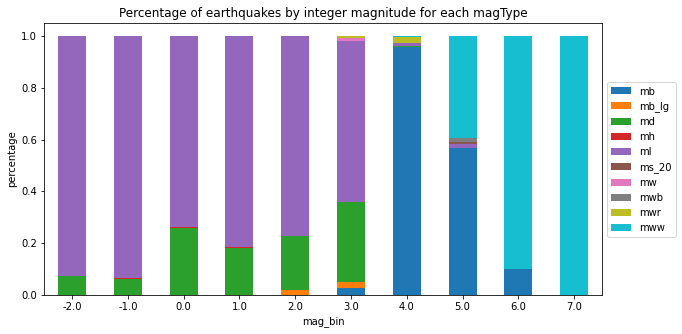

In [58]:
normalized_pivot = pivot.fillna(0).apply(lambda x:x/x.sum(),axis=1)
ax = normalized_pivot.plot.bar(
    stacked = True,rot=0,figsize=(10,5),
    title='Percentage of earthquakes by integer magnitude for each magType'
)

ax.legend(bbox_to_anchor=(1,0.8))
plt.ylabel('percentage')

Text(0, 0.5, '')

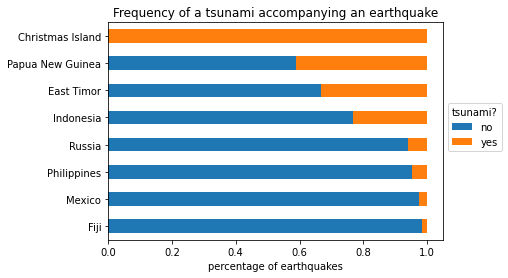

In [60]:
quakes.groupby(['parsed_place','tsunami']).mag.count().unstack().apply(
    lambda x:x/x.sum(),axis=1
).rename(
    columns={0:'no',1:'yes'}
).sort_values('yes',ascending=False)[7::-1].plot.barh(
    title='Frequency of a tsunami accompanying an earthquake',stacked=True
)
plt.legend(title='tsunami?',bbox_to_anchor=(1,0.65))

plt.xlabel('percentage of earthquakes')
plt.ylabel('')